In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
# path to match your directory structure in Google Drive
base_dir = '/content/drive/MyDrive/Brain_tumour_classification'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

In [7]:
# Verify the directories exist
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

Train directory exists: True
Test directory exists: True


In [8]:
print("\nTraining directory contents:")
if os.path.exists(train_dir):
    print(os.listdir(train_dir))


Training directory contents:
['pituitary_tumor', 'no_tumor', 'meningioma_tumor', 'glioma_tumor']


In [9]:
print("\nTesting directory contents:")
if os.path.exists(test_dir):
    print(os.listdir(test_dir))


Testing directory contents:
['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']


In [10]:
img_width, img_height = 224, 224
batch_size = 32

In [11]:
# Step 5: Data preparation
# Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for Test Data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2870 images belonging to 4 classes.


In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2870 images belonging to 4 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 394 images belonging to 4 classes.


In [14]:
class_names = list(train_generator.class_indices.keys())
print(f"\nClass names: {class_names}")
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of test samples: {test_generator.samples}")


Class names: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Number of training samples: 2870
Number of test samples: 394


In [34]:
# Step 7: Build Model using Transfer Learning #bestttt
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load pre-trained ResNet50V2 model
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=outputs)

In [16]:
# Step 7: Build Model using Transfer Learning with EfficientNetB3
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load pre-trained EfficientNetB3 model
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=outputs)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [24]:
from tensorflow.keras.applications import InceptionResNetV2  #64% recieved
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input

# Define input shape
input_shape = (img_width, img_height, 3)

# Load base model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


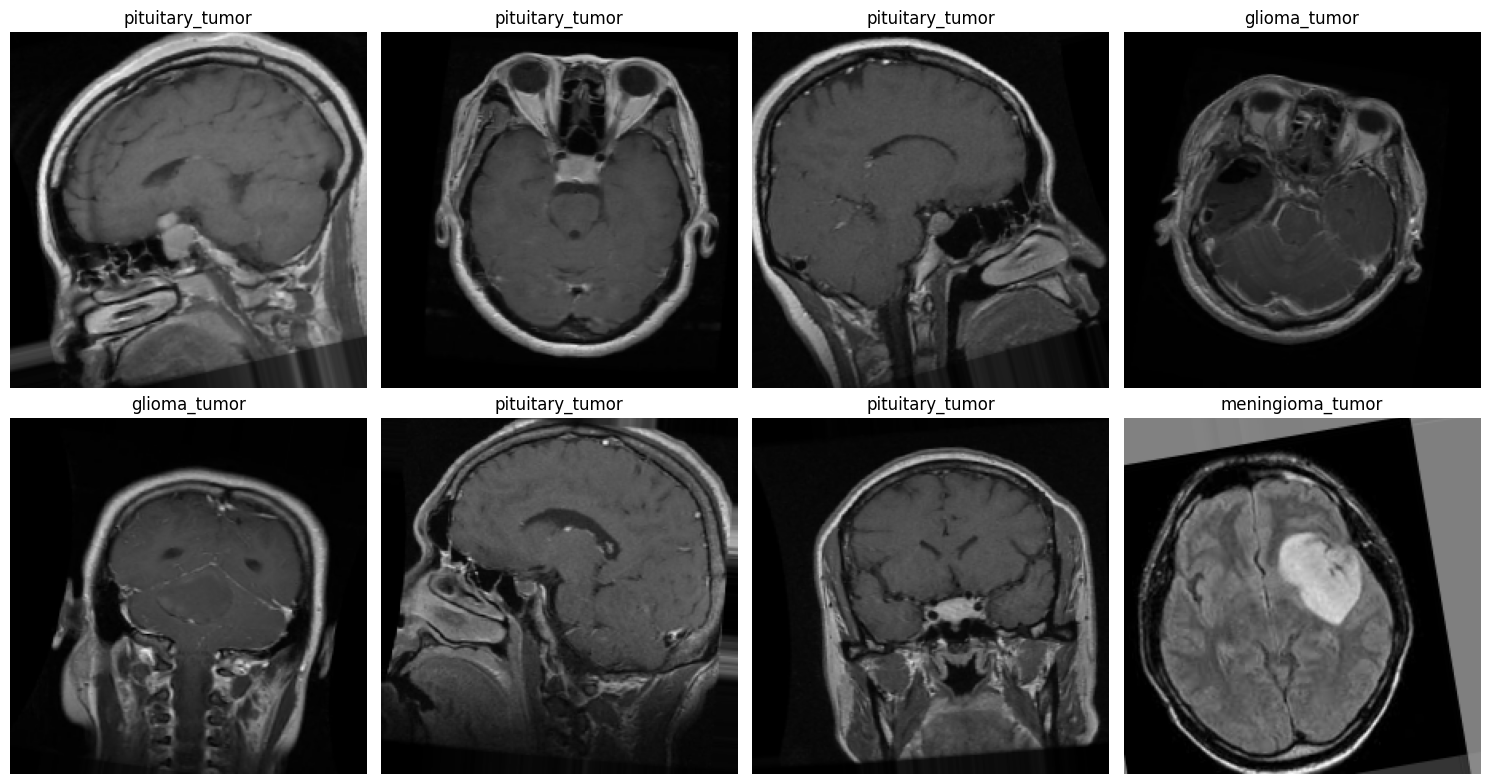

In [25]:
def show_sample_images(generator, class_names, num_images=8):
    plt.figure(figsize=(15, 8))

    # Get a batch of images
    images, labels = next(generator)

    # Show images
    for i in range(min(num_images, len(images))):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show sample images
show_sample_images(train_generator, class_names)

In [26]:
# Create model
input_shape = (img_width, img_height, 3)
model = build_cnn_model(input_shape, len(class_names))

NameError: name 'build_cnn_model' is not defined

In [35]:
# Compile model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
# Step 8: Train the model
# Define callbacks for training
checkpoint_path = '/content/drive/MyDrive/brain_tumor_model_latest2.h5'  # Save to Drive
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

callbacks = [checkpoint, early_stopping, reduce_lr]


In [37]:
# Calculate steps per epoch
steps_per_epoch = train_generator.samples // batch_size
validation_steps = test_generator.samples // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,  # You can adjust this
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.4608 - loss: 1.6131
Epoch 1: val_accuracy improved from -inf to 0.51302, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 76s 692ms/step - accuracy: 0.4621 - loss: 1.6093 - val_accuracy: 0.5130 - val_loss: 1.2781 - learning_rate: 1.0000e-04
Epoch 2/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.5938 - loss: 0.7445

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.51302 to 0.52604, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5938 - loss: 0.7445 - val_accuracy: 0.5260 - val_loss: 1.2707 - learning_rate: 1.0000e-04
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.7261 - loss: 0.8184
Epoch 3: val_accuracy improved from 0.52604 to 0.60156, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 936ms/step - accuracy: 0.7261 - loss: 0.8180 - val_accuracy: 0.6016 - val_loss: 1.1768 - learning_rate: 1.0000e-04
Epoch 4/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.8125 - loss: 0.4589
Epoch 4: val_accuracy did not improve from 0.60156
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8125 - loss: 0.4589 - val_accuracy: 0.5990 - val_loss: 1.1754 - learning_rate: 1.0000e-04
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.7664 - loss: 0.6298
Epoch 5: val_accuracy improved from 0.60156 to 0.65625, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 143s 983ms/step - accuracy: 0.7665 - loss: 0.6297 - val_accuracy: 0.6562 - val_loss: 1.1775 - learning_rate: 1.0000e-04
Epoch 6/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8438 - loss: 0.4460
Epoch 6: val_accuracy did not improve from 0.65625
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8438 - loss: 0.4460 - val_accuracy: 0.6536 - val_loss: 1.1791 - learning_rate: 1.0000e-04
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.8148 - loss: 0.5365
Epoch 7: val_accuracy improved from 0.65625 to 0.67708, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 575ms/step - accuracy: 0.8147 - loss: 0.5368 - val_accuracy: 0.6771 - val_loss: 1.1475 - learning_rate: 1.0000e-04
Epoch 8/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8438 - loss: 0.5550
Epoch 8: val_accuracy did not improve from 0.67708
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8438 - loss: 0.5550 - val_accuracy: 0.6745 - val_loss: 1.1485 - learning_rate: 1.0000e-04
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.8147 - loss: 0.5244
Epoch 9: val_accuracy improved from 0.67708 to 0.67969, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 78s 558ms/step - accuracy: 0.8147 - loss: 0.5242 - val_accuracy: 0.6797 - val_loss: 1.2167 - learning_rate: 1.0000e-04
Epoch 10/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.7812 - loss: 0.5323
Epoch 10: val_accuracy improved from 0.67969 to 0.68229, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7812 - loss: 0.5323 - val_accuracy: 0.6823 - val_loss: 1.2215 - learning_rate: 1.0000e-04
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.8374 - loss: 0.4690
Epoch 11: val_accuracy improved from 0.68229 to 0.69531, saving model to /content/drive/MyDrive/brain_tumor_model_latest2.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 935ms/step - accuracy: 0.8374 - loss: 0.4690 - val_accuracy: 0.6953 - val_loss: 1.1496 - learning_rate: 1.0000e-04
Epoch 12/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9375 - loss: 0.1850
Epoch 12: val_accuracy did not improve from 0.69531

Epoch 12: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9375 - loss: 0.1850 - val_accuracy: 0.6953 - val_loss: 1.1498 - learning_rate: 1.0000e-04
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.8394 - loss: 0.4477
Epoch 13: val_accuracy did not improve from 0.69531
89/89 ━━━━━━━━━━━━━━━━━━━━ 105s 544ms/step - accuracy: 0.8394 - loss: 0.4477 - val_accuracy: 0.6953 - val_loss: 1.1808 - learning_rate: 2.0000e-05
Epoch 14/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9375 - loss: 0.1902
Epoch 14: val_accuracy did not improve from 0.69531
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9375 - loss: 0.

89/89 ━━━━━━━━━━━━━━━━━━━━ 84s 952ms/step - accuracy: 0.8482 - loss: 0.4045 - val_accuracy: 0.7031 - val_loss: 1.2096 - learning_rate: 4.0000e-06
Epoch 20/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.7188 - loss: 0.7725
Epoch 20: val_accuracy did not improve from 0.70312
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7188 - loss: 0.7725 - val_accuracy: 0.6979 - val_loss: 1.2108 - learning_rate: 4.0000e-06
Epoch 21/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.8584 - loss: 0.4046
Epoch 21: val_accuracy did not improve from 0.70312
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 920ms/step - accuracy: 0.8584 - loss: 0.4046 - val_accuracy: 0.7005 - val_loss: 1.2180 - learning_rate: 4.0000e-06
Epoch 22/50
 1/89 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.9375 - loss: 0.4344
Epoch 22: val_accuracy did not improve from 0.70312

Epoch 22: ReduceLROnPlateau reducing learning rate to 1e-06.
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9375 - loss: 0.4344 - val_accurac

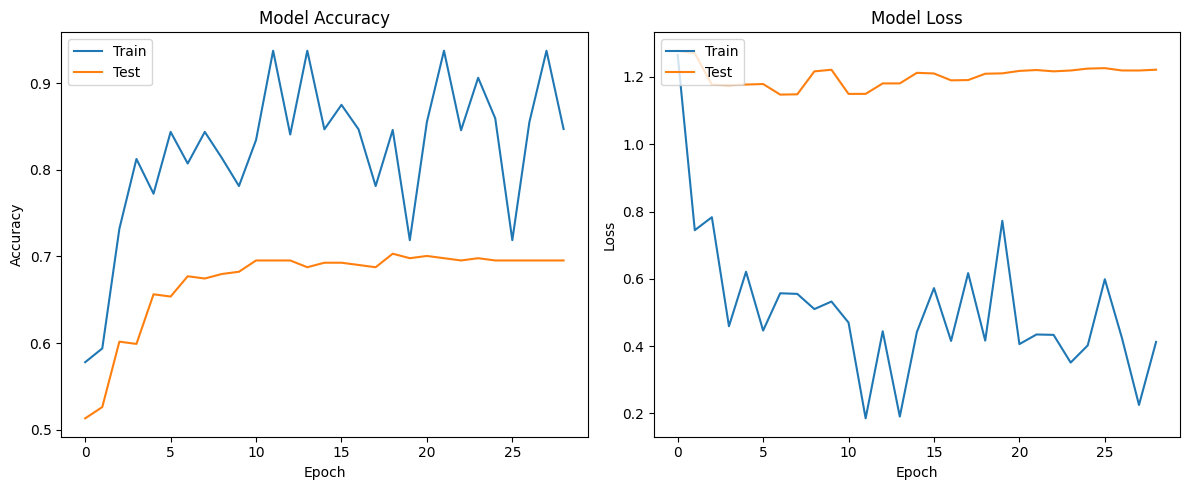

In [38]:

# Plot training history
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)

In [39]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=validation_steps)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.5618 - loss: 2.1343
Test Accuracy: 0.7031
Test Loss: 1.2096


In [40]:
test_generator.reset()
predictions = model.predict(test_generator, steps=validation_steps)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes[:len(predicted_classes)]

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step


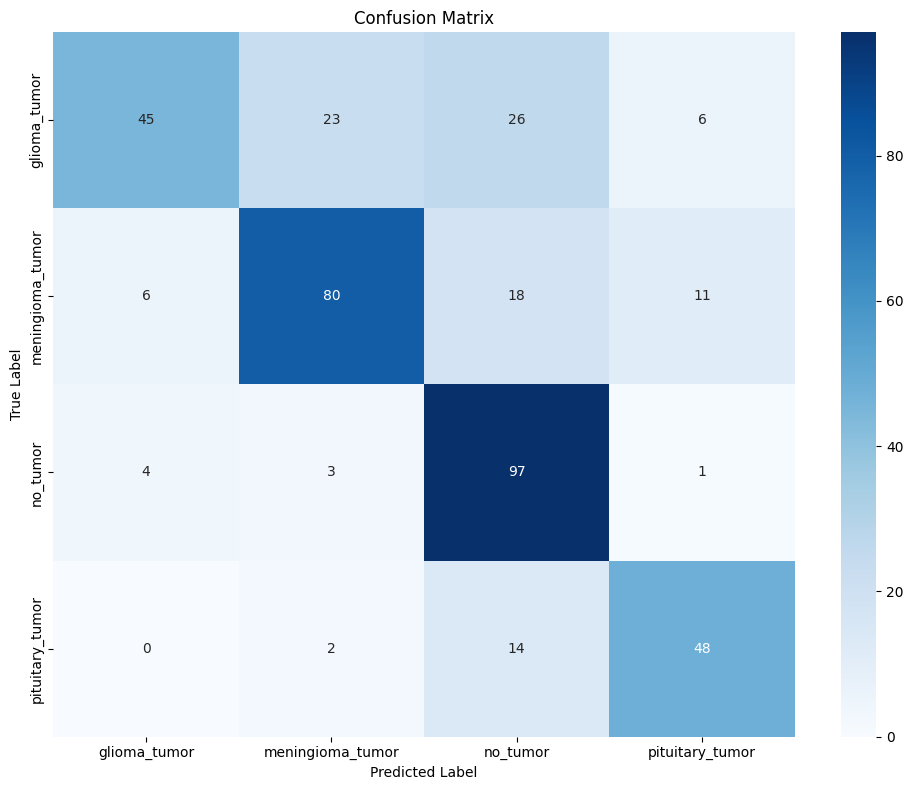

In [41]:
cm = confusion_matrix(true_classes, predicted_classes)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [42]:
# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Function to make a prediction on a single image
def predict_image(image_path, model, class_names):
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_names[predicted_class]
    confidence = prediction[0][predicted_class] * 100

    # Display image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_class_name, confidence

# Save the model for future use
model.save('brain_tumor_cnn_model.h5')
print("Model saved successfully!")

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.82      0.45      0.58       100
meningioma_tumor       0.74      0.70      0.72       115
        no_tumor       0.63      0.92      0.75       105
 pituitary_tumor       0.73      0.75      0.74        64

        accuracy                           0.70       384
       macro avg       0.73      0.70      0.70       384
    weighted avg       0.73      0.70      0.69       384

Model saved successfully!
